Creating ReplayPhenotype and Fitness objects

In [1]:
from gcdyn.fitness import Fitness
from gcdyn.replay import ReplayPhenotype
import gcdyn.replay as replay

In [2]:
replay_phenotype = ReplayPhenotype(
            1,
            1,
            336,
            "https://raw.githubusercontent.com/jbloomlab/Ab-CGGnaive_DMS/main/data/CGGnaive_sites.csv",
            "Linear.model",
            ["delta_log10_KD", "expression"],
            -10.43,
        )


fasta_path = "gcreplay_samples/gctree_PR1.3-1-LB-16-GC.fasta"
seqs = replay.fasta_to_seq_list(fasta_path)

fit = Fitness(Fitness.linear_fitness)
fitness_df = fit.fitness_df(seqs, calculate_KD=replay_phenotype.calculate_KD)

Testing different antigen concentrations vs antigen bound

/Users/alyssa/miniconda3/envs/gcdyn_39/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/alyssa/miniconda3/envs/gcdyn_39/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 10 rows containing missing values.


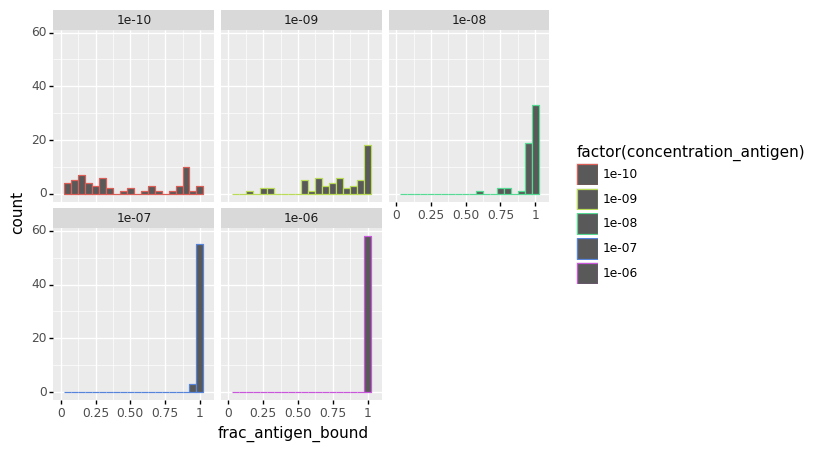

<ggplot: (8762209303420)>

In [3]:
import pandas as pd
from plotnine import ggplot, geom_histogram, aes, facet_wrap, ggtitle, xlim, ylim

antigen_bound_fracs = []
concentrations = []
for c in range(6,11): # concentration of antigen from 10^-6 to 10^-10
    concentration_antigen = 10**(-1*c)
    fit = Fitness(Fitness.linear_fitness, concentration_antigen)
    antigen_bound_fracs.extend(fit.frac_antigen_bound(fitness_df["KD"]))
    concentrations.extend([concentration_antigen]*len(fitness_df["KD"]))

antigen_bound_df = pd.DataFrame({"concentration_antigen": concentrations, "frac_antigen_bound": antigen_bound_fracs})
antigen_bound_df

ggplot(antigen_bound_df) + facet_wrap(facets="~concentration_antigen") + aes(x="frac_antigen_bound", color='factor(concentration_antigen)') + geom_histogram(binwidth=0.05) + xlim(0,1.05)

Mapping to fitness (sigmoidal)

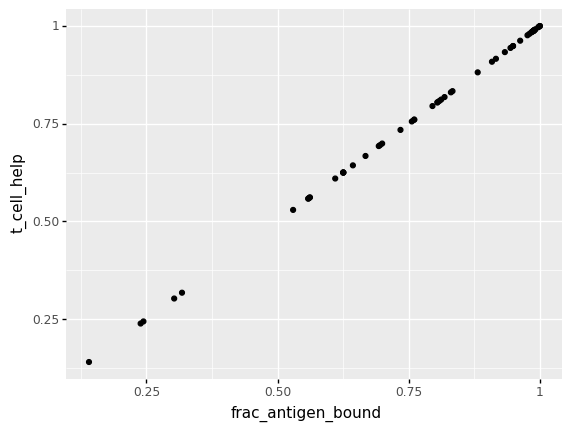

<ggplot: (8762209763572)>

In [4]:
from plotnine import geom_point
from math import exp

ggplot(fitness_df) + aes(x="frac_antigen_bound", y = "t_cell_help") + geom_point()

Normalized fitness

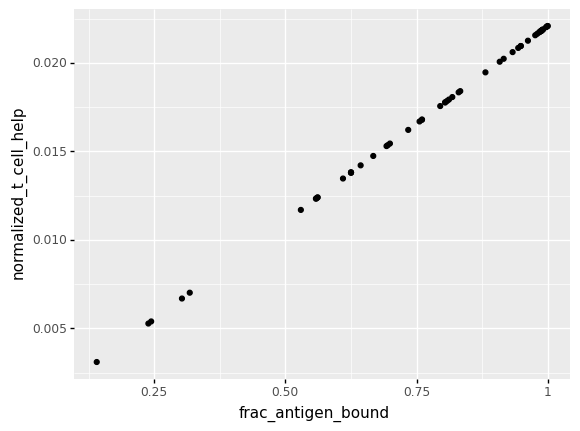

<ggplot: (8762209805695)>

In [5]:
ggplot(fitness_df) + aes(x="frac_antigen_bound", y = "normalized_t_cell_help") + geom_point()

Map to fitness (linear)

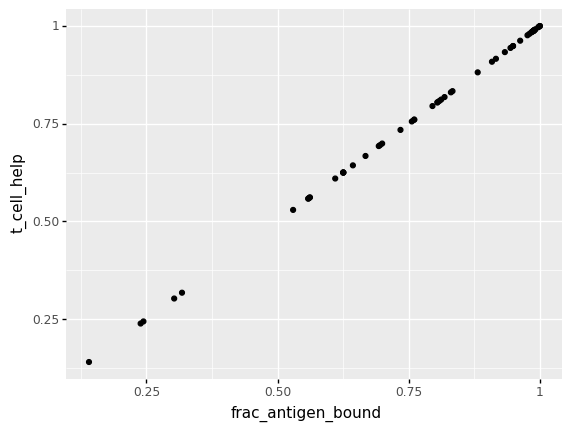

<ggplot: (8762209896012)>

In [6]:
linfit = Fitness(Fitness.linear_fitness)
linfit_fitness_df = linfit.fitness_df(seqs, calculate_KD=replay_phenotype.calculate_KD)
ggplot(linfit_fitness_df) + aes(x="frac_antigen_bound", y = "t_cell_help") + geom_point()

In [7]:
# map normalized fitness linearly to number of cell divisions
test_cell_divs = linfit.map_cell_divisions(linfit_fitness_df, 200)

In [8]:
from ete3 import TreeNode
from numpy.random import default_rng
import numpy as np
from math import floor,ceil


# basic test for proliferating with an integer number of cell divisions
def cell_div_proliferator(treenode: TreeNode, cell_divisions: float, rng: np.random.Generator = default_rng()):
    simple_proliferator(treenode, ceil(cell_divisions), 1/(ceil(cell_divisions)))

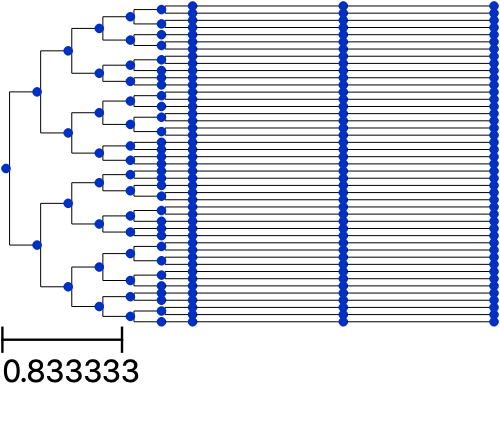

In [1]:
from gcdyn.cycles import GC, simple_proliferator, cell_div_balanced_proliferator, uniform_mutator, cell_div_selector
gc = GC("GAGGTGCAGCTTCAGGAGTCAGGACCTAACCTCGTGAAACCTTCTCAGACTCTGTCCCTCACCTGTTCTGTCACAGGCGACTCCATCACCAGTGGTTACTGGAACTGGATCCGGAAATTCCCAGGGAATAAACTTGAGTACATGGGGTACATAAGCTACAGTGGTAGCACTTACTACAATCCATCTCTCAAAAGTCGAATCTCCATCACTCGAGACACATCCAAGAATCAGTACTACCTGAAGTTGAATTCTGTGACTACTGAGGACACAGCCTCATACTACTGTGGAAGGGACTTCGATGTCTGGGGCGCAGGGACCACGGTCATCGTCTCCTCAGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCACCAATATAGCAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAA", cell_div_balanced_proliferator, uniform_mutator, cell_div_selector, N0=1)
gc.simulate(3, enforce_timescale=True)
gc.tree.render("%%inline", w=500)  